In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 


data_sheet = pd.read_excel('Global_Financial_Development_Database.xlsx')
data_sheet.head()


,iso3,iso2,imfn,country,region,income,year,ai01,ai02,ai03,...,oi14,oi15,oi16,oi16a,oi17,oi18,oi19,oi20a,om01,om02
0,ABW,AW,314,Aruba,Latin America & Caribbean,High income,1960,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,AW,314,Aruba,Latin America & Caribbean,High income,1961,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,AW,314,Aruba,Latin America & Caribbean,High income,1962,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,AW,314,Aruba,Latin America & Caribbean,High income,1963,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,AW,314,Aruba,Latin America & Caribbean,High income,1964,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data=data_sheet[['ai06','di11']]
data.head()

,ai06,di11
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [5]:
financial_system_deposits = data_sheet['ai06']
bank_deposits = data_sheet['di11']

data = pd.DataFrame({'ai06': financial_system_deposits, 'di11': bank_deposits}).dropna()

In [6]:
data.head()

,ai06,di11
175,15.915580,1.524666
178,14.860410,1.447225
237,8.561610,1.489131
240,7.482739,1.752367
243,8.660982,1.972013


Text(0, 0.5, 'Insurance company assets to GDP')

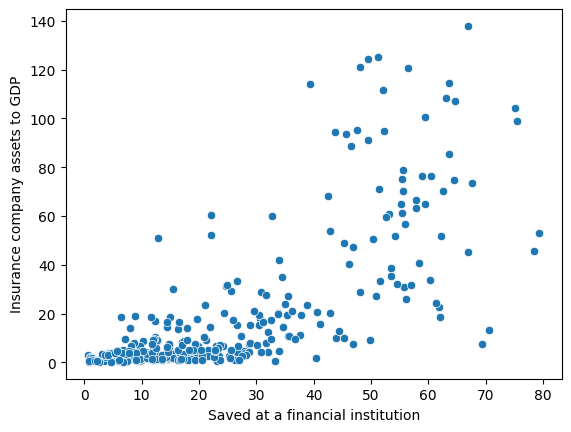

In [7]:
import matplotlib.pyplot as plt
sns.scatterplot(data=data, x='ai06', y='di11')
plt.xlabel('Saved at a financial institution')
plt.ylabel('Insurance company assets to GDP')

In [8]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

model.fit(data[['ai06']], data[['di11']])
model.score(data[['ai06']], data[['di11']])



0.5634680453344879

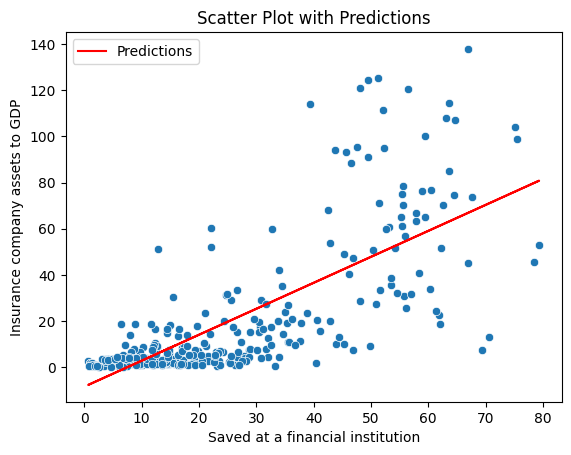

In [9]:
predictions = model.predict(data[['ai06']])
sns.scatterplot(data=data, x='ai06', y='di11')


plt.plot(data['ai06'], predictions, color='red', label='Predictions')


plt.xlabel('Saved at a financial institution')
plt.ylabel('Insurance company assets to GDP')
plt.title('Scatter Plot with Predictions')
plt.legend()  

plt.show()


In [10]:
data.filter(['ai06', 'di11']).describe(percentiles=[0.25,0.5,0.75,0.95]).T

,count,mean,std,min,25%,50%,75%,95%,max
ai06,352.0,23.518914,18.803078,0.692664,8.753014,16.446730,33.780918,61.651408,79.32737
di11,352.0,17.995855,28.208159,0.139219,1.889546,4.865764,18.922603,89.741393,137.96496


In [11]:
data_z = data_sheet[['year', 'si01']]
data_z1 = data_sheet[['year', 'si01']]

In [12]:
data_z.head()

,year,si01
0,1960,NaN
1,1961,NaN
2,1962,NaN
3,1963,NaN
4,1964,NaN


In [13]:
data_z = pd.DataFrame({'si01': data_z['si01']}).dropna()

In [14]:
data_z['year']=data_sheet['year']
data_z.head()

,si01,year
108,48.99729,2006
109,31.96604,2007
110,19.94573,2008
111,26.69275,2009
112,24.95099,2010


In [15]:
data_z = data_z[data_z['year'] > 2006]
data_z.describe().T

,count,mean,std,min,25%,50%,75%,max
si01,2343.0,16.576487,9.528736,-0.325974,9.590345,15.33082,20.523035,66.63377
year,2343.0,2014.016219,4.256877,2007.000000,2010.000000,2014.00000,2018.000000,2021.00000


In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data.head()
reg_ols=smf.ols("ai06 ~ di11",data=data).fit()
print(reg_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                   ai06   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     451.8
Date:                Fri, 05 Jul 2024   Prob (F-statistic):           5.70e-65
Time:                        10:55:28   Log-Likelihood:                -1385.9
No. Observations:                 352   AIC:                             2776.
Df Residuals:                     350   BIC:                             2783.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.5144      0.787     18.445      0.0

In [17]:
hetero_reg=smf.ols("ai06 ~ di11",data=data).fit(cov_type="HC3")
print(hetero_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   ai06   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     260.4
Date:                Fri, 05 Jul 2024   Prob (F-statistic):           3.49e-44
Time:                        10:55:28   Log-Likelihood:                -1385.9
No. Observations:                 352   AIC:                             2776.
Df Residuals:                     350   BIC:                             2783.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.5144      0.711     20.417      0.0

In [18]:
data["acess"]=reg_ols.fittedvalues
data["e"]=reg_ols.resid

In [19]:
data.head()

,ai06,di11,acess,e
175,15.915580,1.524666,15.277271,0.638309
178,14.860410,1.447225,15.238523,-0.378113
237,8.561610,1.489131,15.259491,-6.697881
240,7.482739,1.752367,15.391205,-7.908466
243,8.660982,1.972013,15.501109,-6.840127


In [20]:
data['Region']=data_sheet['region']
data['Country']=data_sheet['country']


In [21]:
data.head()

,ai06,di11,acess,e,Region,Country
175,15.915580,1.524666,15.277271,0.638309,Sub-Saharan Africa,Angola
178,14.860410,1.447225,15.238523,-0.378113,Sub-Saharan Africa,Angola
237,8.561610,1.489131,15.259491,-6.697881,Europe & Central Asia,Albania
240,7.482739,1.752367,15.391205,-7.908466,Europe & Central Asia,Albania
243,8.660982,1.972013,15.501109,-6.840127,Europe & Central Asia,Albania


In [22]:
data.sort_values(by='e',ascending=False).head()

,ai06,di11,acess,e,Region,Country
9047,69.40437,7.340685,18.187416,51.216954,East Asia & Pacific,New Zealand
9044,70.57188,13.106758,21.072570,49.499310,East Asia & Pacific,New Zealand
8858,78.41033,45.659724,37.361007,41.049323,Europe & Central Asia,Norway
8861,79.32737,52.936382,41.002008,38.325362,Europe & Central Asia,Norway
615,62.12402,18.656916,23.849687,38.274333,East Asia & Pacific,Australia


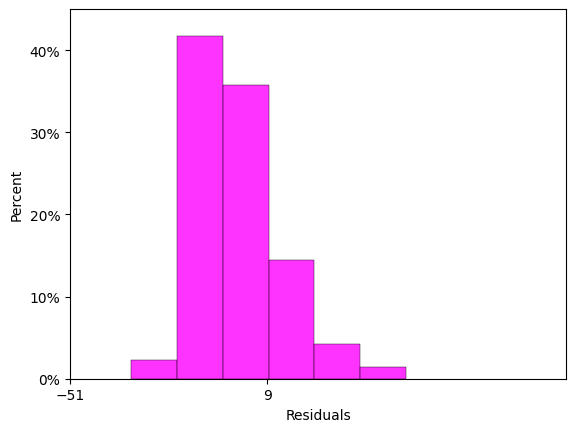

In [23]:
sns.histplot(data=data, x='e', binwidth=15, stat="probability", color="magenta", alpha=0.8, edgecolor="black", linewidth=0.3)


plt.xlabel("Residuals")
plt.ylabel("Percent")
plt.xlim(-51, 100)
plt.ylim(0, 0.45)
plt.xticks(np.arange(-51, 51, 60))
plt.yticks(np.arange(0, 0.45, 0.10), labels=[f"{x:.0%}" for x in np.arange(0, 0.45, 0.10)])

plt.show()

In [24]:
from scipy import stats
stats.ttest_1samp(data_z['si01'],16)        #z-score H0 = 16 , z-score non 16 HA != 16 

TtestResult(statistic=2.9284681990316437, pvalue=0.0034392480240691666, df=2342)

In [25]:
stats.ttest_1samp(data_z['si01'],16,alternative="greater")  #z-score H0 = 16 , z-score non 16 HA > 16 


TtestResult(statistic=2.9284681990316437, pvalue=0.0017196240120345833, df=2342)

In [26]:
stats.ttest_1samp(data_z['si01'],16,alternative="less")      #z-score H0 = 16 , z-score non 16 HA < 16 



TtestResult(statistic=2.9284681990316437, pvalue=0.9982803759879655, df=2342)

In [27]:
data_z['Region']=data_sheet['region']
a = data_z.groupby("Region").agg(
    mean_zscore=("si01", "mean"),     
    se_zscore=("si01", "sem"),        
    num_zscore=("si01", "size")       
)

In [33]:
from scipy.stats import norm # type: ignore

regions = data_sheet['region'].unique()

mean_zscores = a['mean_zscore'].tolist()
se_zscores = a['se_zscore'].tolist()
num_zscores = a['num_zscore'].tolist()

confidence_level = 0.95


critical_value = norm.ppf((1 + confidence_level) / 2)


confidence_intervals = []
for i in range(len(regions)):
    margin_of_error = critical_value * se_zscores[i]
    lower_bound = mean_zscores[i] - margin_of_error
    upper_bound = mean_zscores[i] + margin_of_error
    confidence_intervals.append((lower_bound, upper_bound))


for i in range(len(regions)):
    print(f"Region: {regions[i]}, Confidence Interval: {confidence_intervals[i]}")


Region: Latin America & Caribbean, Confidence Interval: (17.97886810024295, 20.374417891608907)
Region: South Asia, Confidence Interval: (12.43522540087399, 13.692550087984332)
Region: Sub-Saharan Africa, Confidence Interval: (16.377332376817453, 18.04955546888279)
Region: Europe & Central Asia, Confidence Interval: (22.098324121541793, 25.08255265218083)
Region: Middle East & North Africa, Confidence Interval: (21.2572740407241, 25.895212470903807)
Region: East Asia & Pacific, Confidence Interval: (18.94865798358765, 22.078215876412344)
Region: North America, Confidence Interval: (14.098541361324914, 15.130560240207652)
